In [1]:
%matplotlib inline

import os
from pathlib import Path
import numpy as np
import re
import matplotlib.pyplot as plt

FOLDER = Path(os.path.dirname(os.path.realpath("__file__"))) / 'data'
in_file = 'day5.txt'

with open(FOLDER / in_file) as f:
    coords = re.findall(r'(\d+),(\d+) -> (\d+),(\d+)$', f.read(), flags=re.MULTILINE)

coords = np.array(coords, dtype=int)
# get directions
dx = np.sign(coords[:,2] - coords[:, 0])
dy = np.sign(coords[:,3] - coords[:, 1])
coords = np.hstack([coords, np.column_stack([dx,dy])])
dims = (coords[1:,::2].max()+1, coords[:,::2].max()+1)


5632

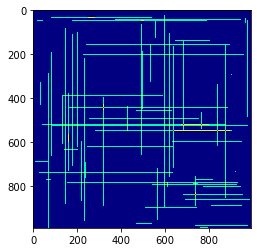

In [2]:
def solution_one(coords, dims):
    field = np.zeros(dims)
    
    for x1, y1, x2, y2, dx, dy in coords:
        if dx == 0:                         # Vertical Line
            field[x1, y1:y2+dy:dy] += 1
        elif dy == 0 :                      # Horizontal Line
            field[x1:x2+dx:dx, y1] += 1

    # lets look just for fun
    plt.imshow(field, cmap='gist_ncar', interpolation='None')

    return np.count_nonzero(field > 1)

solution_one(coords, dims)

22213

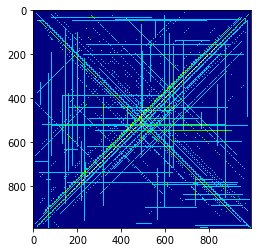

In [11]:
def solution_two(coords, dims):
    field = np.zeros(dims)

    for x1, y1, x2, y2, dx, dy in coords:
        if dx == 0:                         # Vertical Line
            field[x1, y1:y2+dy:dy] += 1
        elif dy == 0 :                      # Horizontal Line
            field[x1:x2+dx:dx, y1] += 1
        elif abs(dx) == abs(dy):            # Unit slope line
            mult = np.arange(abs(x1 - x2) + 1)
            field[(x1 + dx * mult, y1 + dy * mult)] +=1 

    # now with diagonals
    plt.imshow(field, cmap='gist_ncar', interpolation='None')
    return np.count_nonzero(field > 1)

solution_two(coords, dims)